In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten

In [3]:
data=pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=data.rename(columns={"0":"Target"})
data.head()

,Target,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.isnull().sum()

Target    0
0.1       0
0.2       0
0.3       0
0.4       0
         ..
0.644     0
0.645     0
0.646     0
0.647     0
0.648     0
Length: 785, dtype: int64

In [6]:
data.describe()

,Target,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Target', ylabel='count'>

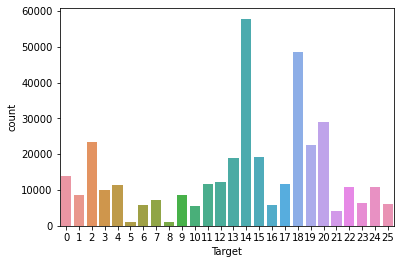

In [7]:
sn.countplot(data["Target"])

In [8]:
import math

In [9]:
data.shape

(372450, 785)

In [10]:
math.sqrt(785)

28.0178514522438

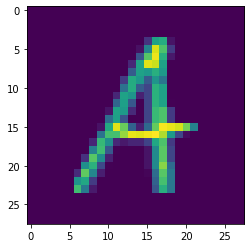

In [11]:
a=data.iloc[2,1:].values
a=a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [12]:
x=data.drop(["Target"],1)
y=data["Target"]

In [13]:
from keras.utils import to_categorical
y=to_categorical(y)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [15]:
data.shape

(372450, 785)

In [16]:
machine=Sequential()
machine.add(Dense(244,input_dim=784,activation="relu"))
machine.add(Dense(128,activation="relu"))
machine.add(Dense(64,activation="relu"))
machine.add(Dense(26,activation="softmax"))
machine.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")


In [17]:
machine.fit(x_train,y_train,epochs=6,verbose=1,)

Epoch 1/6
8148/8148 [==============================] - 27s 3ms/step - loss: 2.0486 - accuracy: 0.7645
Epoch 2/6
8148/8148 [==============================] - 25s 3ms/step - loss: 0.2447 - accuracy: 0.9327
Epoch 3/6
8148/8148 [==============================] - 25s 3ms/step - loss: 0.1853 - accuracy: 0.9504
Epoch 4/6
8148/8148 [==============================] - 25s 3ms/step - loss: 0.1614 - accuracy: 0.9574
Epoch 5/6
8148/8148 [==============================] - 25s 3ms/step - loss: 0.1457 - accuracy: 0.9629
Epoch 6/6
8148/8148 [==============================] - 25s 3ms/step - loss: 0.1403 - accuracy: 0.9649


In [18]:
machine.evaluate(x_test,y_test)

3492/3492 [==============================] - 7s 2ms/step - loss: 0.1550 - accuracy: 0.9631


[0.15495125949382782, 0.9630823135375977]

In [21]:
machine.predict_classes(x[372445:372446])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([25])

In [20]:
data["Target"]

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: Target, Length: 372450, dtype: int64